In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize

In [2]:
# 参考 08 Arevalo 取log bin的函数

def databin_are(lst,f):
    result = [[]]
    f_length = len(f)
    f_i = f[0]
    for i in range(f_length):
        if f[i]<=1.3*f_i:
            result[-1].append(math.log(lst[i],10))
        else:
            if len(result[-1])<=2:
                result[-1].append(math.log(lst[i],10))
            else:
                result.append([])
                result[-1].append(math.log(lst[i],10))
                f_i = f[i]
    result.pop()
    output=[]
    for j in range(len(result)):
        output.append(np.mean(result[j]))
    return output        
            

def databin_are_std(lst,f):
    result = [[]]
    f_length = len(f)
    f_i = f[0]
    for i in range(f_length):
        if f[i]<=1.3*f_i:
            result[-1].append(math.log(lst[i],10))
        else:
            if len(result[-1])<=2:
                result[-1].append(math.log(lst[i],10))
            else:
                result.append([])
                result[-1].append(math.log(lst[i],10))
                f_i = f[i]
    result.pop()
    output=[]
    for j in range(len(result)):
        output.append(np.std(result[j]))
    return output

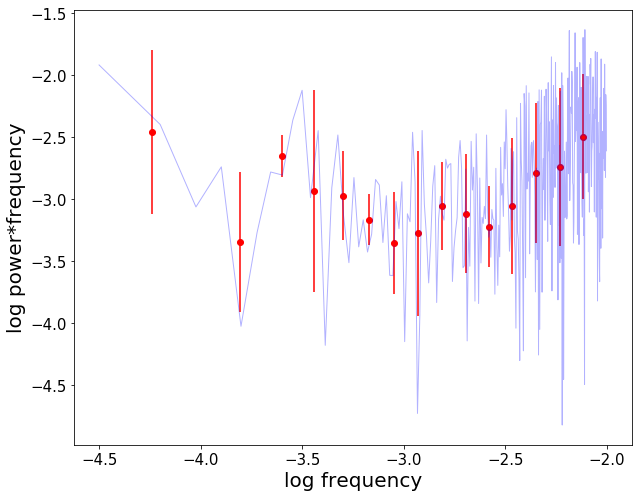

In [3]:
data00_a = pd.read_csv("03_1_tb50(00).csv")  
data00_a['RATE'] = data00_a['RATE'].interpolate()


dt=50
counts_data = data00_a['RATE']
N = len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2    # Nyquist
df = 1/(dt*N)
F_a = np.arange(nf+1)
F = [i*df for i in F_a]
F1 = F[1:int(nf)]    # 除去f=0及f=f_Nyquist
mean_x = np.mean(counts_data)
dft = fft(counts_data-mean_x)
dft1 = dft[1:int(nf)]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log = [math.log(i,10) for i in F1]
ptf_data_log = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_00_a = databin_are(F1,F1)
per_data_binned_00_a = databin_are(per_data,F1)
per_data_b_std_00_a = databin_are_std(per_data,F1)
p_times_f_data_b_00_a = np.array(F1_binned_00_a)+np.array(per_data_binned_00_a)



plt.figure(figsize=(10,8))
plt.plot(F1_log, ptf_data_log, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_00_a, p_times_f_data_b_00_a, color="r", linewidth=1) 
plt.errorbar(F1_binned_00_a, p_times_f_data_b_00_a, yerr=per_data_b_std_00_a, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

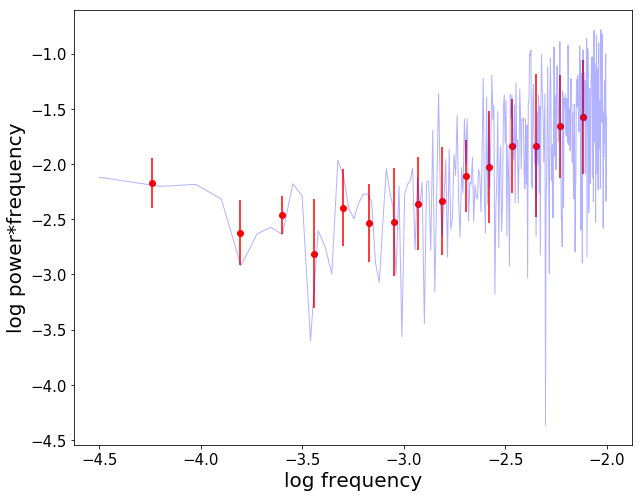

In [4]:
data00_c = pd.read_csv("2_10_tb50(00).csv")  
data00_c['RATE'] = data00_c['RATE'].interpolate()


dt=50
counts_data = data00_c['RATE']
N = len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2    # Nyquist
df = 1/(dt*N)
F_a = np.arange(nf+1)
F = [i*df for i in F_a]
F1 = F[1:int(nf)]    # 除去f=0及f=f_Nyquist
mean_x = np.mean(counts_data)
dft = fft(counts_data-mean_x)
dft1 = dft[1:int(nf)]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log = [math.log(i,10) for i in F1]
ptf_data_log = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_00_c = databin_are(F1,F1)
per_data_binned_00_c = databin_are(per_data,F1)
per_data_b_std_00_c = databin_are_std(per_data,F1)
p_times_f_data_b_00_c = np.array(F1_binned_00_c)+np.array(per_data_binned_00_c)



plt.figure(figsize=(10,8))
plt.plot(F1_log, ptf_data_log, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_00_c, p_times_f_data_b_00_c, color="r", linewidth=1) 
plt.errorbar(F1_binned_00_c, p_times_f_data_b_00_c, yerr=per_data_b_std_00_c, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

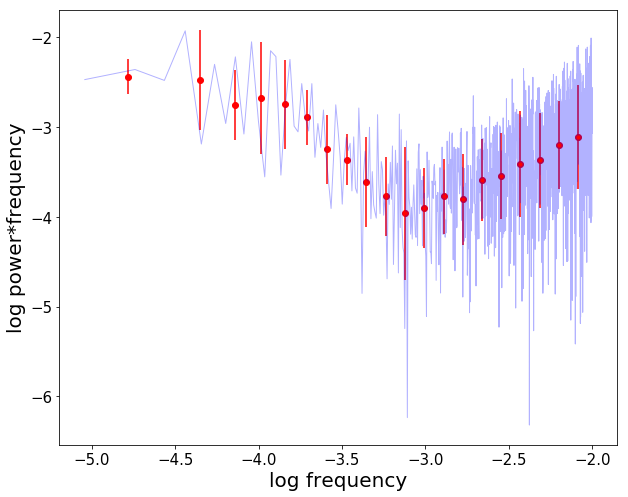

In [5]:
data06_a = pd.read_csv("03_1_tb50(06).csv")  
data06_a['RATE'] = data06_a['RATE'].interpolate()


dt=50
counts_data = data06_a['RATE']
N = len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2    # Nyquist
df = 1/(dt*N)
F_a = np.arange(nf+1)
F = [i*df for i in F_a]
F1 = F[1:int(nf)]    # 除去f=0及f=f_Nyquist
mean_x = np.mean(counts_data)
dft = fft(counts_data-mean_x)
dft1 = dft[1:int(nf)]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log = [math.log(i,10) for i in F1]
ptf_data_log = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_06_a = databin_are(F1,F1)
per_data_binned_06_a = databin_are(per_data,F1)
per_data_b_std_06_a = databin_are_std(per_data,F1)
p_times_f_data_b_06_a = np.array(F1_binned_06_a)+np.array(per_data_binned_06_a)



plt.figure(figsize=(10,8))
plt.plot(F1_log, ptf_data_log, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_06_a, p_times_f_data_b_06_a, color="r", linewidth=1) 
plt.errorbar(F1_binned_06_a, p_times_f_data_b_06_a, yerr=per_data_b_std_06_a, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

perlist_06 = {'f':F1,'per':per_data}
test = pd.DataFrame(perlist_06,columns = ['f','per'])
test.to_csv('perlist06_s.csv')

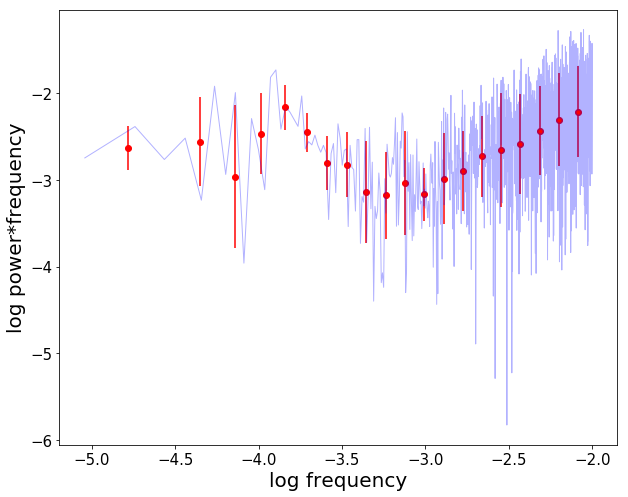

In [6]:
data06_c = pd.read_csv("2_10_tb50(06).csv")  
data06_c['RATE'] = data06_c['RATE'].interpolate()


dt=50
counts_data = data06_c['RATE']
N = len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2    # Nyquist
df = 1/(dt*N)
F_a = np.arange(nf+1)
F = [i*df for i in F_a]
F1 = F[1:int(nf)]    # 除去f=0及f=f_Nyquist
mean_x = np.mean(counts_data)
dft = fft(counts_data-mean_x)
dft1 = dft[1:int(nf)]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log = [math.log(i,10) for i in F1]
ptf_data_log = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_06_c = databin_are(F1,F1)
per_data_binned_06_c = databin_are(per_data,F1)
per_data_b_std_06_c = databin_are_std(per_data,F1)
p_times_f_data_b_06_c = np.array(F1_binned_06_c)+np.array(per_data_binned_06_c)



plt.figure(figsize=(10,8))
plt.plot(F1_log, ptf_data_log, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_06_c, p_times_f_data_b_06_c, color="r", linewidth=1) 
plt.errorbar(F1_binned_06_c, p_times_f_data_b_06_c, yerr=per_data_b_std_06_c, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

perlist_06 = {'f':F1,'per':per_data}
test = pd.DataFrame(perlist_06,columns = ['f','per'])
test.to_csv('perlist06_h.csv')

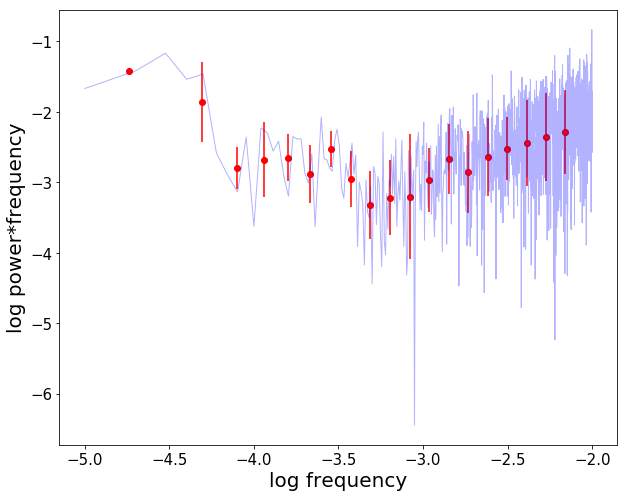

In [7]:
data091_a = pd.read_csv("03_1_tb50(091).csv")  
data091_a['RATE'] = data091_a['RATE'].interpolate()


dt=50
counts_data = data091_a['RATE']
N = len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2    # Nyquist
df = 1/(dt*N)
F_a = np.arange(nf+1)
F = [i*df for i in F_a]
F1 = F[1:int(nf)]    # 除去f=0及f=f_Nyquist
mean_x = np.mean(counts_data)
dft = fft(counts_data-mean_x)
dft1 = dft[1:int(nf)]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log = [math.log(i,10) for i in F1]
ptf_data_log = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_091_a = databin_are(F1,F1)
per_data_binned_091_a = databin_are(per_data,F1)
per_data_b_std_091_a = databin_are_std(per_data,F1)
p_times_f_data_b_091_a = np.array(F1_binned_091_a)+np.array(per_data_binned_091_a)



plt.figure(figsize=(10,8))
plt.plot(F1_log, ptf_data_log, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_091_a, p_times_f_data_b_091_a, color="r", linewidth=1) 
plt.errorbar(F1_binned_091_a, p_times_f_data_b_091_a, yerr=per_data_b_std_091_a, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

perlist_091 = {'f':F1,'per':per_data}
test = pd.DataFrame(perlist_091,columns = ['f','per'])
test.to_csv('perlist091_s.csv')

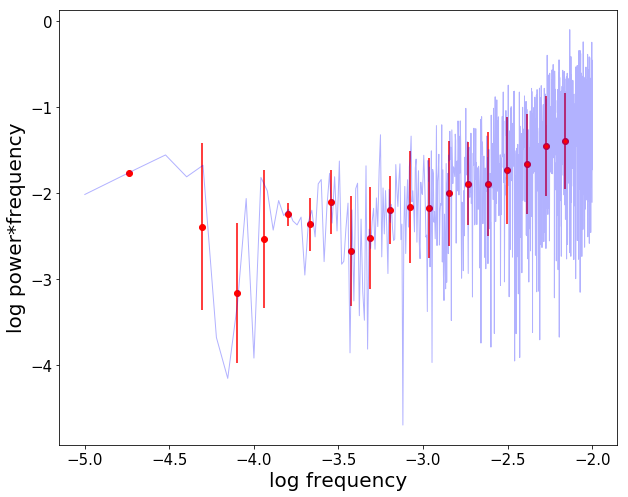

In [8]:
data091_c = pd.read_csv("2_10_tb50(091).csv")  
data091_c['RATE'] = data091_c['RATE'].interpolate()


dt=50
counts_data = data091_c['RATE']
N = len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2    # Nyquist
df = 1/(dt*N)
F_a = np.arange(nf+1)
F = [i*df for i in F_a]
F1 = F[1:int(nf)]    # 除去f=0及f=f_Nyquist
mean_x = np.mean(counts_data)
dft = fft(counts_data-mean_x)
dft1 = dft[1:int(nf)]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log = [math.log(i,10) for i in F1]
ptf_data_log = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_091_c = databin_are(F1,F1)
per_data_binned_091_c = databin_are(per_data,F1)
per_data_b_std_091_c = databin_are_std(per_data,F1)
p_times_f_data_b_091_c = np.array(F1_binned_091_c)+np.array(per_data_binned_091_c)



plt.figure(figsize=(10,8))
plt.plot(F1_log, ptf_data_log, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_091_c, p_times_f_data_b_091_c, color="r", linewidth=1) 
plt.errorbar(F1_binned_091_c, p_times_f_data_b_091_c, yerr=per_data_b_std_091_c, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

perlist_091 = {'f':F1,'per':per_data}
test = pd.DataFrame(perlist_091,columns = ['f','per'])
test.to_csv('perlist091_h.csv')

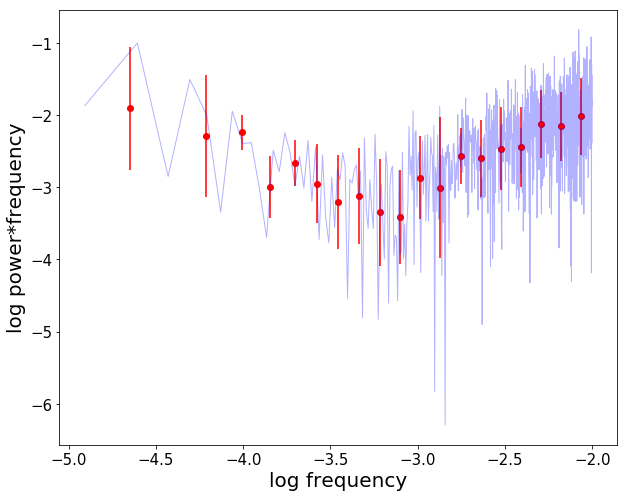

In [9]:
data092_a = pd.read_csv("03_1_tb50(092).csv")  
data092_a['RATE'] = data092_a['RATE'].interpolate()


dt=50
counts_data = data092_a['RATE']
N = len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2    # Nyquist
df = 1/(dt*N)
F_a = np.arange(nf+1)
F = [i*df for i in F_a]
F1 = F[1:int(nf)]    # 除去f=0及f=f_Nyquist
mean_x = np.mean(counts_data)
dft = fft(counts_data-mean_x)
dft1 = dft[1:int(nf)]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log = [math.log(i,10) for i in F1]
ptf_data_log = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_092_a = databin_are(F1,F1)
per_data_binned_092_a = databin_are(per_data,F1)
per_data_b_std_092_a = databin_are_std(per_data,F1)
p_times_f_data_b_092_a = np.array(F1_binned_092_a)+np.array(per_data_binned_092_a)



plt.figure(figsize=(10,8))
plt.plot(F1_log, ptf_data_log, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_092_a, p_times_f_data_b_092_a, color="r", linewidth=1) 
plt.errorbar(F1_binned_092_a, p_times_f_data_b_092_a, yerr=per_data_b_std_092_a, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

perlist_092 = {'f':F1,'per':per_data}
test = pd.DataFrame(perlist_092,columns = ['f','per'])
test.to_csv('perlist092_s.csv')

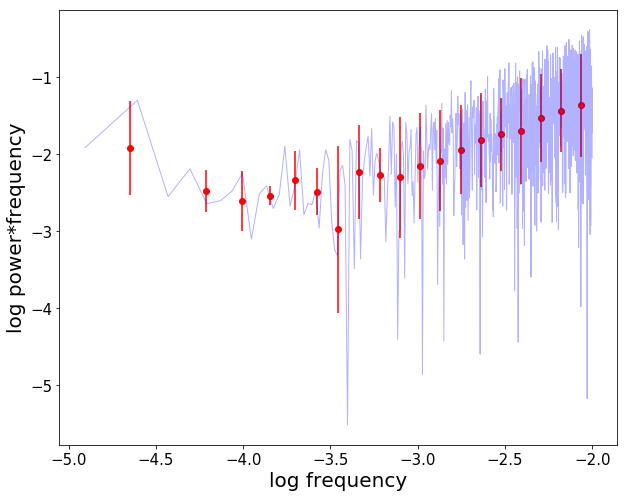

In [10]:
data092_c = pd.read_csv("2_10_tb50(092).csv")  
data092_c['RATE'] = data092_c['RATE'].interpolate()


dt=50
counts_data = data092_c['RATE']
N = len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2    # Nyquist
df = 1/(dt*N)
F_a = np.arange(nf+1)
F = [i*df for i in F_a]
F1 = F[1:int(nf)]    # 除去f=0及f=f_Nyquist
mean_x = np.mean(counts_data)
dft = fft(counts_data-mean_x)
dft1 = dft[1:int(nf)]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log = [math.log(i,10) for i in F1]
ptf_data_log = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_092_c = databin_are(F1,F1)
per_data_binned_092_c = databin_are(per_data,F1)
per_data_b_std_092_c = databin_are_std(per_data,F1)
p_times_f_data_b_092_c = np.array(F1_binned_092_c)+np.array(per_data_binned_092_c)



plt.figure(figsize=(10,8))
plt.plot(F1_log, ptf_data_log, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_092_c, p_times_f_data_b_092_c, color="r", linewidth=1) 
plt.errorbar(F1_binned_092_c, p_times_f_data_b_092_c, yerr=per_data_b_std_092_c, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

perlist_092 = {'f':F1,'per':per_data}
test = pd.DataFrame(perlist_092,columns = ['f','per'])
test.to_csv('perlist092_h.csv')

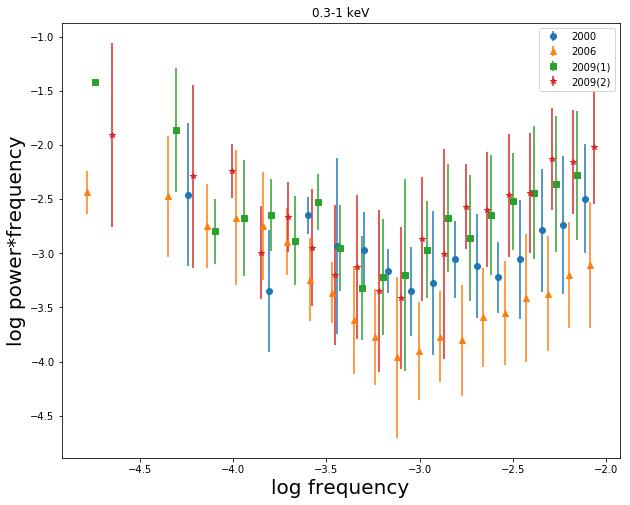

In [11]:
plt.figure(figsize=(10,8))
plt.errorbar(F1_binned_00_a, p_times_f_data_b_00_a, yerr=per_data_b_std_00_a, fmt='o', label='2000')
plt.errorbar(F1_binned_06_a, p_times_f_data_b_06_a, yerr=per_data_b_std_06_a, fmt='^', label='2006')
plt.errorbar(F1_binned_091_a, p_times_f_data_b_091_a, yerr=per_data_b_std_091_a, fmt='s',label='2009(1)')
plt.errorbar(F1_binned_092_a, p_times_f_data_b_092_a, yerr=per_data_b_std_092_a, fmt='*',label='2009(2)')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.title("0.3-1 keV")
plt.legend()
plt.show()

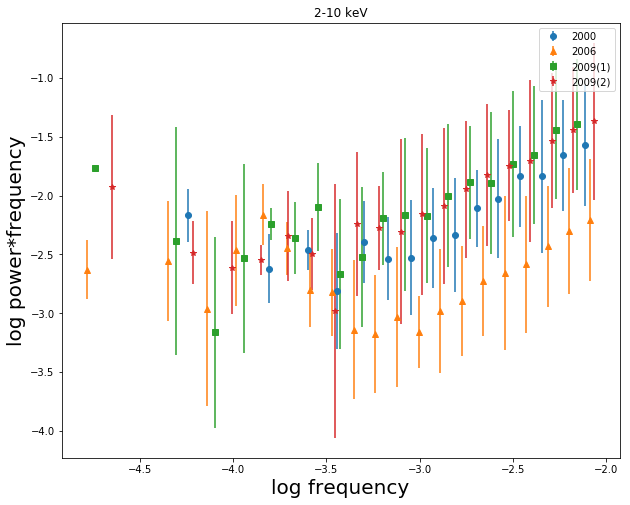

In [12]:
plt.figure(figsize=(10,8))
plt.errorbar(F1_binned_00_c, p_times_f_data_b_00_c, yerr=per_data_b_std_00_c, fmt='o', label='2000')
plt.errorbar(F1_binned_06_c, p_times_f_data_b_06_c, yerr=per_data_b_std_06_c, fmt='^', label='2006')
plt.errorbar(F1_binned_091_c, p_times_f_data_b_091_c, yerr=per_data_b_std_091_c, fmt='s',label='2009(1)')
plt.errorbar(F1_binned_092_c, p_times_f_data_b_092_c, yerr=per_data_b_std_092_c, fmt='*',label='2009(2)')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.title("2-10 keV")
plt.legend()
plt.show()

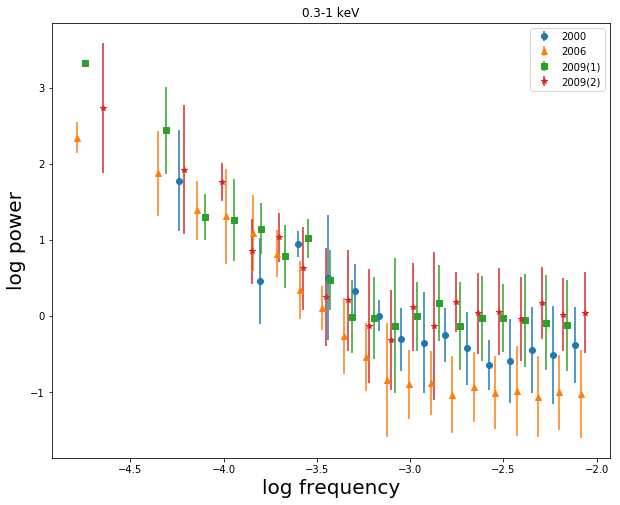

In [13]:
plt.figure(figsize=(10,8))
plt.errorbar(F1_binned_00_a, per_data_binned_00_a, yerr=per_data_b_std_00_a, fmt='o', label='2000')
plt.errorbar(F1_binned_06_a, per_data_binned_06_a, yerr=per_data_b_std_06_a, fmt='^', label='2006')
plt.errorbar(F1_binned_091_a, per_data_binned_091_a, yerr=per_data_b_std_091_a, fmt='s',label='2009(1)')
plt.errorbar(F1_binned_092_a, per_data_binned_092_a, yerr=per_data_b_std_092_a, fmt='*',label='2009(2)')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power",fontsize=20)
plt.title("0.3-1 keV")
plt.legend()
plt.show()

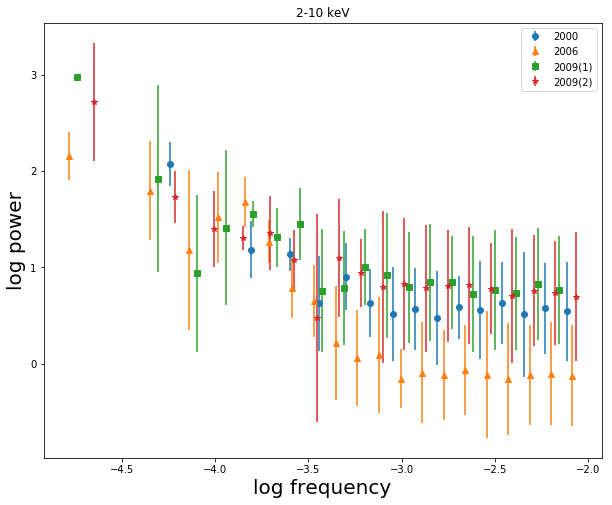

In [14]:
plt.figure(figsize=(10,8))
plt.errorbar(F1_binned_00_c, per_data_binned_00_c, yerr=per_data_b_std_00_c, fmt='o', label='2000')
plt.errorbar(F1_binned_06_c, per_data_binned_06_c, yerr=per_data_b_std_06_c, fmt='^', label='2006')
plt.errorbar(F1_binned_091_c, per_data_binned_091_c, yerr=per_data_b_std_091_c, fmt='s',label='2009(1)')
plt.errorbar(F1_binned_092_c, per_data_binned_092_c, yerr=per_data_b_std_092_c, fmt='*',label='2009(2)')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power",fontsize=20)
plt.title("2-10 keV")
plt.legend()
plt.show()

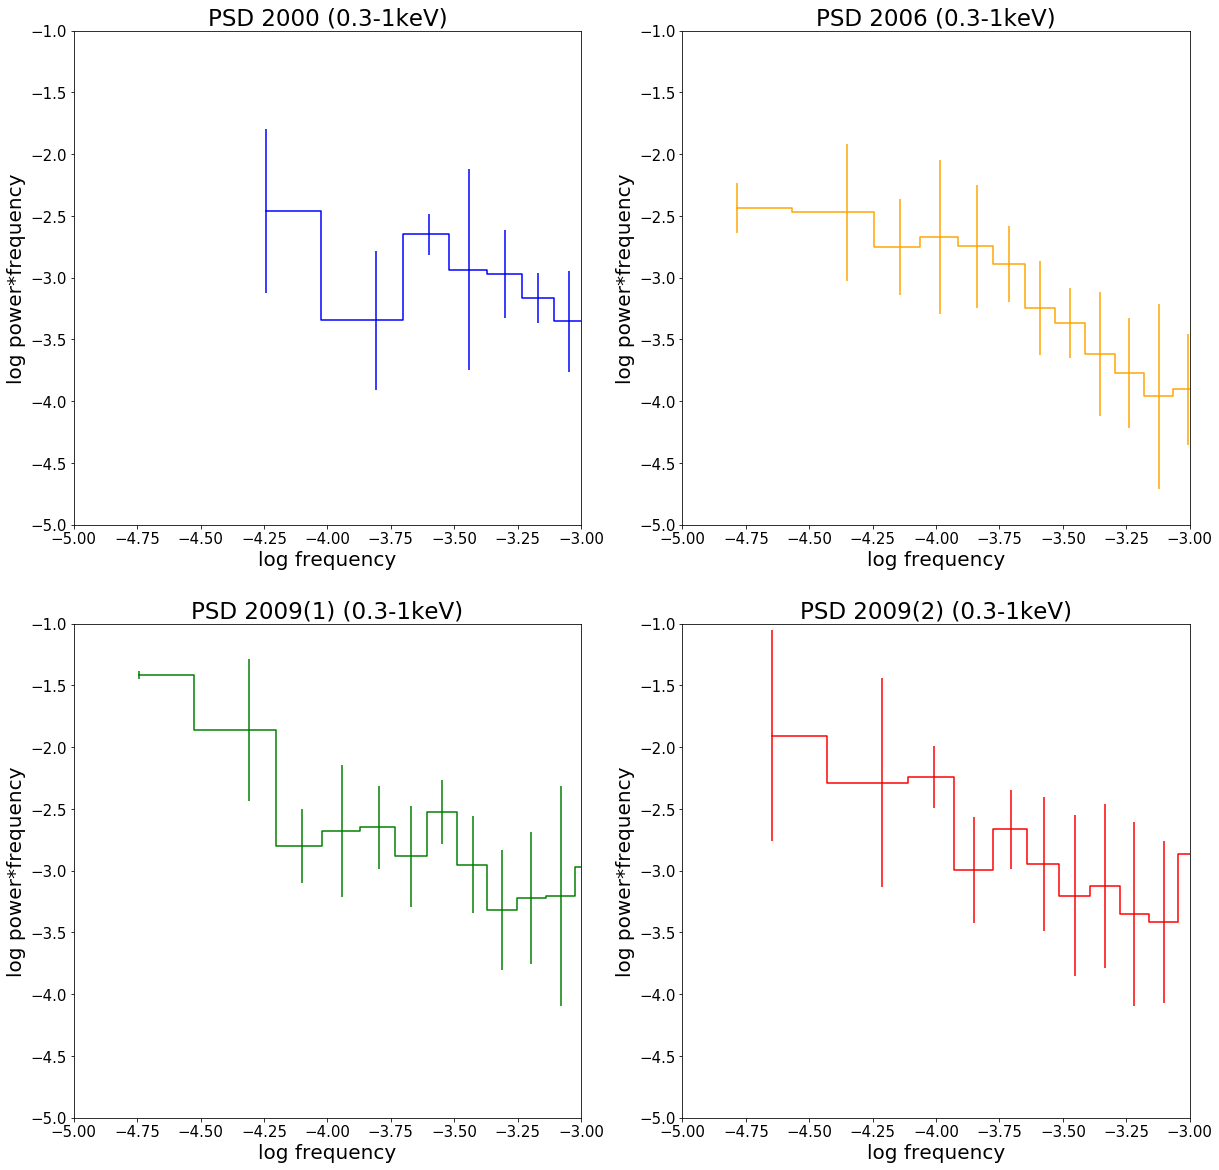

In [15]:
fig= plt.figure(figsize=(20,20))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

ax1.step(F1_binned_00_a, p_times_f_data_b_00_a, where='mid',color="b")
ax2.step(F1_binned_06_a, p_times_f_data_b_06_a, where='mid',color="orange")
ax3.step(F1_binned_091_a, p_times_f_data_b_091_a, where='mid', color="g")
ax4.step(F1_binned_092_a, p_times_f_data_b_092_a, where='mid', color="r")

ax1.errorbar(F1_binned_00_a, p_times_f_data_b_00_a, yerr=per_data_b_std_00_a, fmt=',',color="b", label='2000')
ax2.errorbar(F1_binned_06_a, p_times_f_data_b_06_a, yerr=per_data_b_std_06_a, fmt=',',color="orange", label='2006')
ax3.errorbar(F1_binned_091_a, p_times_f_data_b_091_a, yerr=per_data_b_std_091_a, fmt=',',color="g",label='2009(1)')
ax4.errorbar(F1_binned_092_a, p_times_f_data_b_092_a, yerr=per_data_b_std_092_a, fmt=',',color="r",label='2009(2)')


ax1.set_xlabel("log frequency",fontsize=20)
ax1.set_ylabel("log power*frequency",fontsize=20)
ax1.set_xlim(-5.0,-3.0)
ax1.set_ylim(-5,-1)
ax1.tick_params(labelsize=15)
ax1.set_title("PSD 2000 (0.3-1keV)",fontsize=23)
ax2.set_xlabel("log frequency",fontsize=20)
ax2.set_ylabel("log power*frequency",fontsize=20)
ax2.set_xlim(-5.0,-3.0)
ax2.set_ylim(-5,-1)
ax2.tick_params(labelsize=15)
ax2.set_title("PSD 2006 (0.3-1keV)",fontsize=23)
ax3.set_xlabel("log frequency",fontsize=20)
ax3.set_ylabel("log power*frequency",fontsize=20)
ax3.set_xlim(-5.0,-3.0)
ax3.set_ylim(-5,-1)
ax3.tick_params(labelsize=15)
ax3.set_title("PSD 2009(1) (0.3-1keV)",fontsize=23)
ax4.set_xlabel("log frequency",fontsize=20)
ax4.set_ylabel("log power*frequency",fontsize=20)
ax4.set_xlim(-5.0,-3.0)
ax4.set_ylim(-5,-1)
ax4.tick_params(labelsize=15)
ax4.set_title("PSD 2009(2) (0.3-1keV)",fontsize=23)
plt.show()

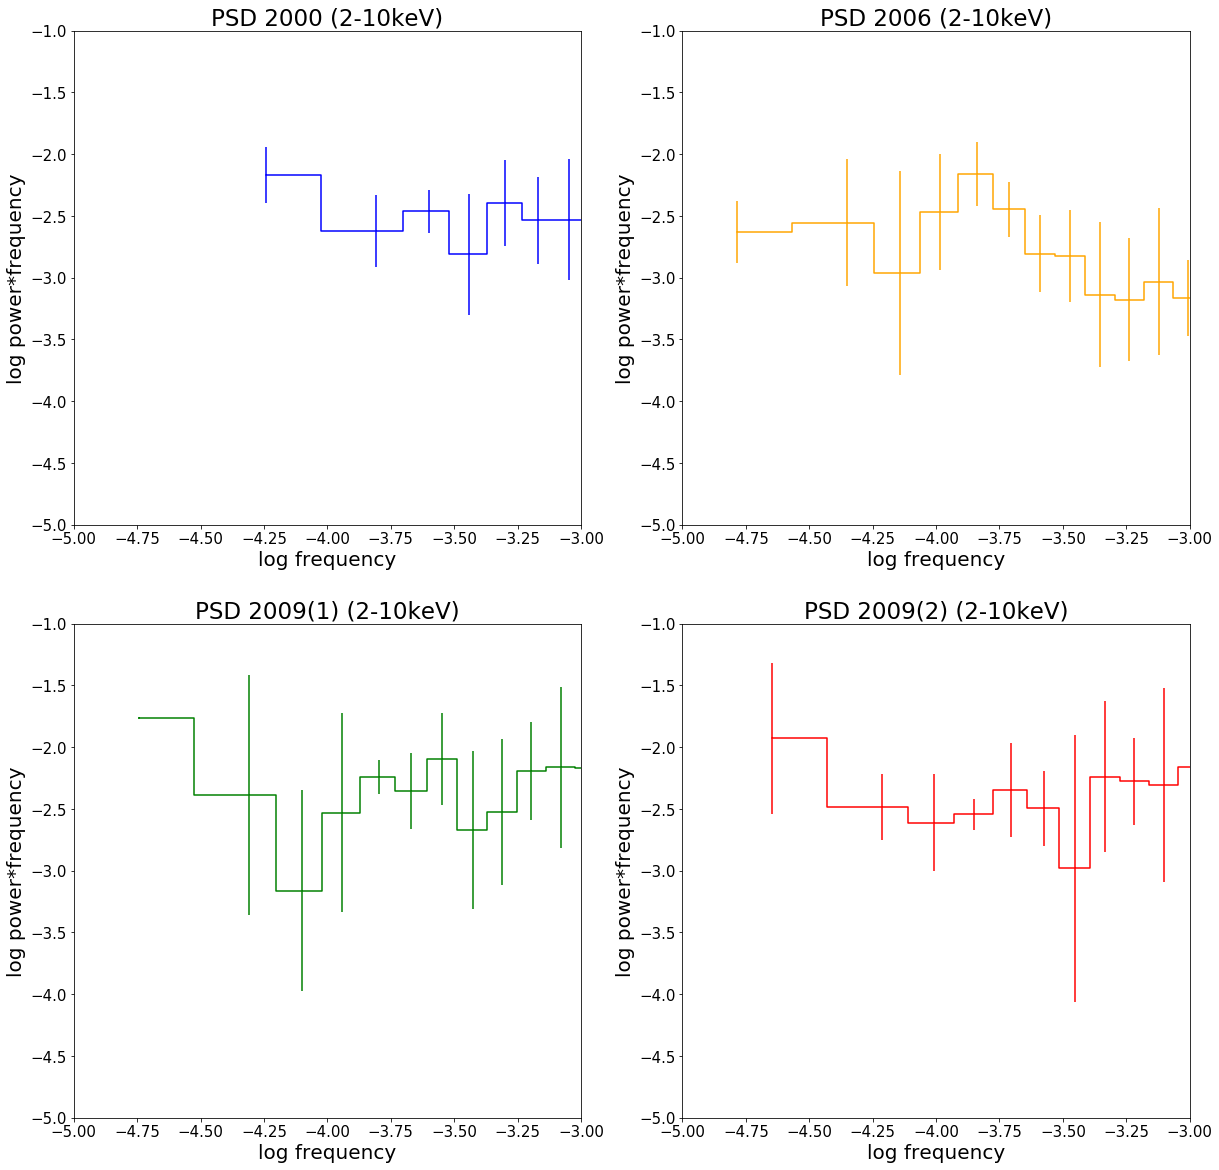

In [16]:
fig= plt.figure(figsize=(20,20))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

ax1.step(F1_binned_00_c, p_times_f_data_b_00_c, where='mid',color="b")
ax2.step(F1_binned_06_c, p_times_f_data_b_06_c, where='mid',color="orange")
ax3.step(F1_binned_091_c, p_times_f_data_b_091_c, where='mid', color="g")
ax4.step(F1_binned_092_c, p_times_f_data_b_092_c, where='mid', color="r")

ax1.errorbar(F1_binned_00_c, p_times_f_data_b_00_c, yerr=per_data_b_std_00_c, fmt=',',color="b", label='2000')
ax2.errorbar(F1_binned_06_c, p_times_f_data_b_06_c, yerr=per_data_b_std_06_c, fmt=',',color="orange", label='2006')
ax3.errorbar(F1_binned_091_c, p_times_f_data_b_091_c, yerr=per_data_b_std_091_c, fmt=',',color="g",label='2009(1)')
ax4.errorbar(F1_binned_092_c, p_times_f_data_b_092_c, yerr=per_data_b_std_092_c, fmt=',',color="r",label='2009(2)')


ax1.set_xlabel("log frequency",fontsize=20)
ax1.set_ylabel("log power*frequency",fontsize=20)
ax1.set_xlim(-5.0,-3.0)
ax1.set_ylim(-5,-1)
ax1.tick_params(labelsize=15)
ax1.set_title("PSD 2000 (2-10keV)",fontsize=23)
ax2.set_xlabel("log frequency",fontsize=20)
ax2.set_ylabel("log power*frequency",fontsize=20)
ax2.set_xlim(-5.0,-3.0)
ax2.set_ylim(-5,-1)
ax2.tick_params(labelsize=15)
ax2.set_title("PSD 2006 (2-10keV)",fontsize=23)
ax3.set_xlabel("log frequency",fontsize=20)
ax3.set_ylabel("log power*frequency",fontsize=20)
ax3.set_xlim(-5.0,-3.0)
ax3.set_ylim(-5,-1)
ax3.tick_params(labelsize=15)
ax3.set_title("PSD 2009(1) (2-10keV)",fontsize=23)
ax4.set_xlabel("log frequency",fontsize=20)
ax4.set_ylabel("log power*frequency",fontsize=20)
ax4.set_xlim(-5.0,-3.0)
ax4.set_ylim(-5,-1)
ax4.tick_params(labelsize=15)
ax4.set_title("PSD 2009(2) (2-10keV)",fontsize=23)
plt.show()